O intuito dessa análise é verificar os pedidos de LAI mês e mês e ver a proporção de recusas em cada mês. Com isso, pretendemos verificar se houve um aumento estatisticamente significativo do percentual de recusas mensal a partir da entrada em vigor da LGPD. Busca-se nessa análise verificar se houve um aumento sistêmico, em todo o Executivo Federal. Nesse momento não estamos interessados em verificar se há órgãos que fazem uso deliberado desse dispositivo.

Inicialmente vamos abrir a base de dados e remover algumas colunas que não vamos precisar nessa análise. Vamos manter apenas a seguintes variáveis, que são suficientes para realizar a análise desejada: data_registro, assunto_pedido, sub_assunto_pedido, decisao, especificacao_decisao.

In [1]:
import pandas as pd

# Carrega as base de dados...
df_completa_cgu = pd.read_csv('./dados/base_completa_sem_pedido_e_resposta/pedidos_lai_metadados_2012_a_2022.csv', encoding='utf-16', sep=';')
df_filtrada_cgu = pd.read_csv('./dados/base_filtrada_com_pedido_e_resposta/pedidos_lai_com_solicitacao_e_resposta_2015_a_2022.csv', encoding='utf-16', sep=';')

# ... e filtra apenas as variáveis de interesse:
variaveis_de_interesse = ['id_pedido', 'protocolo_pedido', 'data_registro', 'assunto_pedido', 'sub_assunto_pedido', 'decisao', 'especificacao_decisao']
df_completa_cgu = df_completa_cgu[variaveis_de_interesse]
df_filtrada_cgu = df_filtrada_cgu[variaveis_de_interesse]

Como estamos trabalhando com dois dataframes (um com a base completa e outro com a base filtrada), vamos também extrair um terceiro dataframe (df_dif) que contém a diferença entre eles:

In [2]:
# Para facilitar o merge, renomeia as variáveis
df_completa_cgu.columns = ['id_pedido', 'protocolo_pedido_c', 'data_registro_c', 'assunto_pedido_c', 'sub_assunto_pedido_c', 'decisao_c', 'especificacao_decisao_c']
df_filtrada_cgu.columns = ['id_pedido', 'protocolo_pedido_f', 'data_registro_f', 'assunto_pedido_f', 'sub_assunto_pedido_f', 'decisao_f', 'especificacao_decisao_f']

# e faz o merge (outer join) na variável id_pedido
df_merge = pd.merge(df_completa_cgu, df_filtrada_cgu, on='id_pedido', how='outer')

# Agora vamos separar a diferença entre os dois dataframes:
df_dif = df_merge[df_merge.protocolo_pedido_f.isnull()]

# Esse dataframe tem apenas o conteúdo do completo que não tem na base filtrada.
# Então remove os dados referentes as variáveis filtradas (são todas nulas).
# Só pra checar:
sum(df_dif.protocolo_pedido_f.isnull()) - len(df_dif) # é igual a 0
df_dif = df_dif[['id_pedido', 'protocolo_pedido_c', 'data_registro_c', 'assunto_pedido_c', 'sub_assunto_pedido_c', 'decisao_c', 'especificacao_decisao_c']]

# E pra manter o padrão, renomeia as colunas de volta:
df_dif.columns = ['id_pedido', 'protocolo_pedido', 'data_registro', 'assunto_pedido', 'sub_assunto_pedido', 'decisao', 'especificacao_decisao']

# E renomeia novamente as colunas dos dataframes originais:
df_completa_cgu.columns = ['id_pedido', 'protocolo_pedido', 'data_registro', 'assunto_pedido', 'sub_assunto_pedido', 'decisao', 'especificacao_decisao']
df_filtrada_cgu.columns = ['id_pedido', 'protocolo_pedido', 'data_registro', 'assunto_pedido', 'sub_assunto_pedido', 'decisao', 'especificacao_decisao']

Com as variáveis filtradas, vamos agora ajustar a coluna data. Ao abrir o arquivo, a data fica no formato string. Para trabalhar com datas vamos converter essas variáveis para o formato datetime.

In [3]:
def converte_variavel_para_datetime(df, col):
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y')
    return df

df_completa_cgu = converte_variavel_para_datetime(df_completa_cgu, 'data_registro')
df_filtrada_cgu = converte_variavel_para_datetime(df_filtrada_cgu, 'data_registro')
df_dif = converte_variavel_para_datetime(df_dif, 'data_registro')

Só para teste, vamos considerar todas as bases a partir de 2016. Todas tem registro a partir de 2016.

Essa chamada aqui pode ser alterada para qualquer valor de ano para testar outros conjuntos. Para considerar as bases completas, basta colocar algo menor que 2012, visto que os registros começam em 2012.

In [4]:
def remove_registros_antes(df, ano):
    return df[df.data_registro.dt.year >= ano]

def remove_registro_depois(df, ano, mes):
    return df[(df.data_registro.dt.year < ano) | ( (df.data_registro.dt.year == ano) & (df.data_registro.dt.month <= mes))]
    

df_completa_cgu = remove_registros_antes(df_completa_cgu, 2012)
df_filtrada_cgu = remove_registros_antes(df_filtrada_cgu, 2012)
df_dif = remove_registros_antes(df_dif, 2012)

df_completa_cgu = remove_registro_depois(df_completa_cgu, 2022, 4)
df_filtrada_cgu = remove_registro_depois(df_filtrada_cgu, 2022, 4)
df_dif = remove_registro_depois(df_dif, 2022, 4)

Vamos checar agora quais são os assuntos tratados por essas bases:

In [5]:
def print_unique_variavel(df, variavel, label):
    assuntos = df[variavel].unique()
    assuntos.sort()
    
    print(label, '\n', "\n".join(assuntos))
    print('----------------------\n')
    
print_unique_variavel(df_completa_cgu, 'assunto_pedido', 'Base completa')
print_unique_variavel(df_filtrada_cgu, 'assunto_pedido', 'Base filtrada')
print_unique_variavel(df_dif, 'assunto_pedido', 'Diff')

Base completa 
  
Abastecimento
Abono salarial
Acesso à informação
Acreditação de Organismos e Laboratórios
Aduana
Aeronáutica
Agendamento
Agendamento de Consultas
Agente Público
Agradecimento aos profissionais da Saúde
Agricultura
Alimentação Animal
Animais
Aposentadoria
Armamento
Assentamento
Assistência Hospitalar e Ambulatorial
Assistência Judiciária
Assistência Social
Assistência ao Idoso
Assistência ao Portador de Deficiência
Assistência à Criança e ao Adolescente
Assédio moral
Assédio sexual
Atendimento
Atendimento Básico
Auditoria
Auxílio
Avaliação da Conformidade
Bancos 
Benefício
Benefícios Sociais
Bibliotecas
Biodiversidade
Bolsas
Cadastro
Cadastro Único
Certidões e Declarações
Certificado ou Diploma
Cidadania
Cinema
Cirurgia
Clima
Combate a Epidemias
Combate a pobreza
Combate à desigualdade
Comercio externo
Compras governamentais
Comunicações Postais
Concurso
Conduta Docente
Conduta Ética
Conteúdo jornalístico
Controle social
Convênio
Cooperação Internacional
Coronavírus (C

Vamos remover da nossa base de dados todas as solicitações cujo assunto é "Dados Pessoais - LGPD". Isso é necessário pois estamos verificando a "cartada da LGPD" nas solicitações de LAI.

Removendo:

In [6]:
def remove_assunto_do_df(df, assunto):
    tam_antes = len(df)
    df = df[df.assunto_pedido != assunto]
    tam_depois = len(df)
    print(f'Foram removidos {tam_antes - tam_depois} registros')
    return df

#df_completa_cgu = remove_assunto_do_df(df_completa_cgu, "Dados Pessoais - LGPD")
#df_filtrada_cgu = remove_assunto_do_df(df_filtrada_cgu, "Dados Pessoais - LGPD")
#df_dif = remove_assunto_do_df(df_dif, "Dados Pessoais - LGPD")

Vamos verificar agora os tipos de decisões que essas solicitações tiveram:

In [7]:
print_unique_variavel(df_completa_cgu, 'decisao', 'Base completa')
print_unique_variavel(df_filtrada_cgu, 'decisao', 'Base filtrada')
print_unique_variavel(df_dif, 'decisao', 'Diff')

Base completa 
  
Acesso Concedido
Acesso Negado
Acesso Parcialmente Concedido
Informação Inexistente
Não se trata de solicitação de informação
Pergunta Duplicada/Repetida
Órgão não tem competência para responder sobre o assunto
----------------------

Base filtrada 
 Acesso Concedido
Acesso Negado
Acesso Parcialmente Concedido
Informação Inexistente
Não se trata de solicitação de informação
Pergunta Duplicada/Repetida
Órgão não tem competência para responder sobre o assunto
----------------------

Diff 
  
Acesso Concedido
Acesso Negado
Acesso Parcialmente Concedido
Informação Inexistente
Não se trata de solicitação de informação
Pergunta Duplicada/Repetida
Órgão não tem competência para responder sobre o assunto
----------------------



Como podemos perceber, há solicitações que devem ser removidas da análise, visto que não há informação de acesso. Por isso, vamos manter apenas as solicitações cujo acesso foi concedido/parcialmente concedido/negado.

In [8]:
def remove_solicitacoes_sem_info_acesso(df):
    tam_antes = len(df)
    df = df[df.decisao.str.startswith('Acesso')]
    tam_depois = len(df)
    print(f'Foram removidos {tam_antes - tam_depois} registros')
    return df

df_completa_cgu = remove_solicitacoes_sem_info_acesso(df_completa_cgu)
df_filtrada_cgu = remove_solicitacoes_sem_info_acesso(df_filtrada_cgu)
df_dif = remove_solicitacoes_sem_info_acesso(df_dif)

Foram removidos 210780 registros
Foram removidos 114987 registros
Foram removidos 95793 registros


Temos agora três tipos de informação: "Acesso Concedido", "Acesso Negado" e "Acesso Parcialmente Concedido". Como nesta análise queremos observar o efeito de decisões negadas com o tempo, vamos agrupar em apenas dois tipos: "Acesso Concedido" e "Acesso Negado ou Parcialmente Negado":

In [9]:
def normaliza_decisao(df):
    df['decisao_normalizada'] = df.decisao.apply(lambda decisao : 'Acesso Concedido' if decisao == 'Acesso Concedido' else 'Acesso Negado ou Parcialmente Negado')
    return df
    
df_completa_cgu = normaliza_decisao(df_completa_cgu)
df_filtrada_cgu = normaliza_decisao(df_filtrada_cgu)
df_dif = normaliza_decisao(df_dif)

Feito isso, agora podemos agrupar mês a mês as decisões e calcular o percentual de cada tipo:

In [10]:
def calcula_percentual_mensal_tipo_decisao(df):
    # Agrupa por ano e mês e calcula o percentual de cada tipo de decisão
    percentual_por_mes = df.groupby([df.data_registro.dt.year, df.data_registro.dt.month]).decisao_normalizada.value_counts(normalize=True)*100
    
    # Altera o nome dos índices para representar corretamente o ano/mês
    percentual_por_mes.index.names = ['ano', 'mes', 'decisao_normalizada']
    
    # Alera o nome da série
    percentual_por_mes.name = 'percentual'

    # Planifica o índice para voltar a criar um dataframe
    df_percentual_mes = percentual_por_mes.reset_index()
    
    return df_percentual_mes

df_completa_perc_mensal = calcula_percentual_mensal_tipo_decisao(df_completa_cgu)
df_filtrada_perc_mensal = calcula_percentual_mensal_tipo_decisao(df_filtrada_cgu)
df_dif_perc_mensal = calcula_percentual_mensal_tipo_decisao(df_dif)

Agora podemos exportar esses dados para um csv:

In [11]:
df_completa_perc_mensal.to_csv('./dados/base_completa.csv', encoding='utf-16', sep=';', index=False)
df_filtrada_perc_mensal.to_csv('./dados/base_filtrada.csv', encoding='utf-16', sep=';', index=False)
df_dif_perc_mensal.to_csv('./dados/dif.csv', encoding='utf-16', sep=';', index=False)

Vamos agora separar as bases de dados em antes e depois de um mês de corte. Para isso vamos definir a função split_df e simplestemente retornar 2 DF, um df_antes e um df_depois. O primeiro inclui todos os dados até o mês/ano passado como parâmetro (não inclusivo). O segundo incluir todos os dados a partir do mês/ano passado como parâmetro (inclusivo):

In [12]:
def split_df(df, mes, ano):
    idxAntes = (df.ano < ano) | ( (df.ano == ano) & (df.mes < mes) )
    idxDepois = ~idxAntes

    return df[idxAntes], df[idxDepois]

A LGPD foi publicada dia 14 de agosto de 2018 e entrou completamente em vigor 2 anos após esta data. Assim, como nossa periodicidade aqui é mensal (mês completo), vamos considerar o antes como os dados anteriores a setembro/2020. E, o depois, como os dados após (incluindo) setembro de 2020.

Além disso, vamos considerar apenas os resultados cuja decisao_normalizada é "Acesso Negado ou Parcialmente Negado" (na verdade, tanto faz usar esse valor ou o valor de "Acesso Concedido", pois o resultado é o mesmo acrescido de uma constante).

In [13]:
def remove_solicitacoes_com_acesso_concedido(df):
    return df[df.decisao_normalizada == 'Acesso Negado ou Parcialmente Negado']    


df_completa_perc_mensal = remove_solicitacoes_com_acesso_concedido(df_completa_perc_mensal)
df_filtrada_perc_mensal = remove_solicitacoes_com_acesso_concedido(df_filtrada_perc_mensal)
df_dif_perc_mensal = remove_solicitacoes_com_acesso_concedido(df_dif_perc_mensal)

df_completa_antes, df_completa_depois = split_df(df_completa_perc_mensal, 9, 2020)
df_filtrada_antes, df_filtrada_depois = split_df(df_filtrada_perc_mensal, 9, 2020)
df_dif_antes, df_dif_depois = split_df(df_dif_perc_mensal, 9, 2020)


Vamos rodar o teste de normalidade Shapiro-Wilk nessas bases.

A conclusão aqui é que não há evidência suficiente para dizer que os dados não vieram de uma distribuição normal (p-valor < 5% rejeita o H0).

In [14]:
from scipy.stats import shapiro

print('Resultados da base completa:')
print(shapiro(df_completa_antes.percentual))
print(shapiro(df_completa_depois.percentual))

print('\nResultados da base filtrada:')
print(shapiro(df_filtrada_antes.percentual))
print(shapiro(df_filtrada_depois.percentual))

print('\nResultados da base dif:')
print(shapiro(df_dif_antes.percentual))
print(shapiro(df_dif_depois.percentual))

Resultados da base completa:
ShapiroResult(statistic=0.9794619083404541, pvalue=0.12069471925497055)
ShapiroResult(statistic=0.8752891421318054, pvalue=0.01457214541733265)

Resultados da base filtrada:
ShapiroResult(statistic=0.9879996180534363, pvalue=0.7607434988021851)
ShapiroResult(statistic=0.7709512710571289, pvalue=0.00032874278258532286)

Resultados da base dif:
ShapiroResult(statistic=0.9699103236198425, pvalue=0.0217581819742918)
ShapiroResult(statistic=0.9406878352165222, pvalue=0.24705956876277924)


Vamos verificar também como é o histograma dessas distribuições:

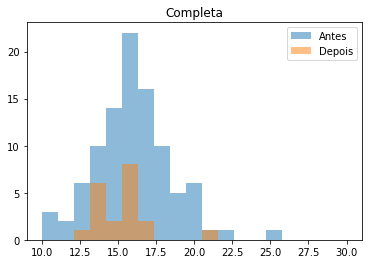

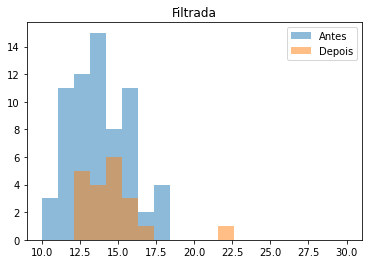

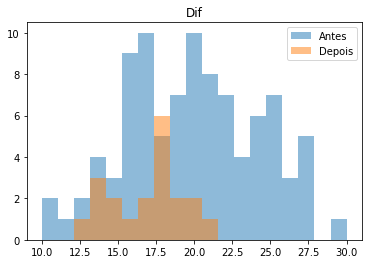

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograma(df_antes, df_depois, titulo):
    bins = np.linspace(10, 30, 20)
    
    plt.hist(df_antes.percentual, bins, alpha=0.5, label='Antes')
    plt.hist(df_depois.percentual, bins, alpha=0.5, label='Depois')
    plt.title(titulo)
    plt.legend(loc='upper right')
    plt.show()

plot_histograma(df_completa_antes, df_completa_depois, 'Completa')
plot_histograma(df_filtrada_antes, df_filtrada_depois, 'Filtrada')
plot_histograma(df_dif_antes, df_dif_depois, 'Dif')

Agora vamos fazer o teste-t antes e depois das bases completas e filtradas e ver os resultados:

In [16]:
from scipy.stats import ttest_ind

print('Resultados da base completa:')
print(ttest_ind(df_completa_antes.percentual, df_completa_depois.percentual, equal_var=False, alternative='two-sided'))

print('\nResultados da base filtrada:')
print(ttest_ind(df_filtrada_antes.percentual, df_filtrada_depois.percentual, equal_var=False, alternative='two-sided'))

print('\nResultados da dif:')
print(ttest_ind(df_dif_antes.percentual, df_dif_depois.percentual, equal_var=False, alternative='two-sided'))

Resultados da base completa:
Ttest_indResult(statistic=1.0349368021839742, pvalue=0.3065608060473129)

Resultados da base filtrada:
Ttest_indResult(statistic=-1.8467208348599131, pvalue=0.0744463015128189)

Resultados da dif:
Ttest_indResult(statistic=4.113660811758748, pvalue=0.00011368673153923921)


A interpretação aqui é a seguinte:

- Base completa: p-valor < 5%, rejeita H0 e ficamos com H1, o que significa que há evidências suficientes para dizer que as médias são diferentes antes/depois da LGPD.

- Base filtrada: p-valor > 5%, dizemos que não há evidências suficientes para rejeitar H0, ou seja, não dá pra dizer que as médias são diferentes.

No caso da base completa, como as médias são diferentes, vamos definir como hipótese alternativa a taxa anterior ser MAIOR que a taxa depois da LGPD. A ideia aqui é só verificar o teste, pois o histograma acima já diz isso mesmo:

In [17]:
print(ttest_ind(df_completa_antes.percentual, df_completa_depois.percentual, equal_var=False, alternative='greater'))

Ttest_indResult(statistic=1.0349368021839742, pvalue=0.15328040302365645)


Ou seja, olhando a base completa desde 2012 concluímos que a média mensal de rejeição antes da LAI (de 2012 a 2020) foi menor do que o do período posterior a LAI (9/2020, 2021, 2022).